### Overview Data 

| **Variable Name**          | **Description**                                                                                     |
|----------------------------|-----------------------------------------------------------------------------------------------------|
| **Country Name**            | Country Name                                                                                        |
| **Country Code**            | Country Code                                                                                        |
| **Year**                    | Year of Data                                                                                        |
| **Pop_Growth**              | Population growth (annual %)                                                                        |
| **Poverty_Ratio**           | Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                                 |
| **Electricity_Access**      | Access to electricity (% of population)                                                             |
| **Age_Dependency**          | Age dependency ratio (% of working-age population)                                                  |
| **Bank_Capital**            | Bank capital to assets ratio (%)                                                                    |
| **Birth_Rate**              | Birth rate, crude (per 1,000 people)                                                                |
| **Central_gov_debt**        | Central government debt, total (% of GDP)                                                           |
| **Children_Out_School**     | Children out of school (% of primary school age)                                                    |
| **Corruption_Control**      | Control of Corruption: Percentile Rank                                                              |
| **Edu_attainment**          | Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)   |
| **Youth_Employment_Ratio**  | Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)                        |
| **Employers_Percentage**    | Employers, total (% of total employment) (modeled ILO estimate)                                     |
| **Final_Consumption**       | Final consumption expenditure (current US$)                                                         |
| **FDI_Percentage**          | Foreign direct investment, net inflows (% of GDP)                                                   |
| **GDP_PerCapita**           | GDP per capita (current US$)                                                                        |
| **Gini_Index**              | Gini index                                                                                          |
| **Edu_Expenditure**         | Government expenditure on education, total (% of GDP)                                               |
| **HCI**                     | Human capital index (HCI) (scale 0-1)                                                               |
| **Labor_Advanced_Edu**      | Labor force with advanced education (% of total working-age population with advanced education)      |
| **Labor_Total**             | Labor force, total                                                                                  |
| **Life_Expectancy**         | Life expectancy at birth total (years)                                                              |
| **Net_Migration**           | Net migration                                                                                       |


## Import library

In [824]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

## Read dataset

In [825]:
data = pd.read_excel("D:/P_Data_Extract_From_World_Development_Indicators.xlsx") 
data.head(3)

,Country Name,Country Code,Year,Population growth (annual %),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Access to electricity (% of population),Age dependency ratio (% of working-age population),Bank capital to assets ratio (%),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Final consumption expenditure (current US$),"Foreign direct investment, net inflows (% of GDP)",GDP per capita (current US$),Gini index,"Government expenditure on education, total (% of GDP)",Human capital index (HCI) (scale 0-1),Labor force with advanced education (% of total working-age population with advanced education),"Labor force, total","Life expectancy at birth, total (years)",Net migration
0,Indonesia,IDN,2000,1.447088,43.8,86.3,55.335852,NaN,21.860,,...,1.125152e+11,-2.757440,770.865352,30.3,NaN,,87.261,100650982,66.433,-42697
1,Indonesia,IDN,2001,1.410099,40.3,86.3,54.702120,NaN,21.548,,...,1.123758e+11,-1.855686,739.003947,31.2,2.46003,,79.744,101677754,66.758,-64261
2,Indonesia,IDN,2002,1.373519,23.5,87.6,54.144727,NaN,21.174,,...,1.465101e+11,0.074152,888.901390,30.2,2.64569,,86.065,101821401,67.134,-83985


change of variable name 

In [826]:
# Define the mapping from long descriptions to variable names
column_mapping = {
    "Country Name": "Country_Name",
    "Country Code": "Country_Code",
    "Year": "Year",
    "Population growth (annual %)": "Pop_Growth",
    "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)": "Poverty_Ratio",
    "Access to electricity (% of population)": "Electricity_Access",
    "Age dependency ratio (% of working-age population)": "Age_Dependency",
    "Bank capital to assets ratio (%)": "Bank_Capital",
    "Birth rate, crude (per 1,000 people)": "Birth_Rate",
    "Central government debt, total (% of GDP)": "Central_gov_debt",
    "Children out of school (% of primary school age)": "Children_Out_School",
    "Control of Corruption: Percentile Rank" : "Corruption_Control",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)" : "Edu_attainment",
    "Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)" : "Youth_Employment_Ratio",                        
    "Employers, total (% of total employment) (modeled ILO estimate)" : "Employers_Percentage",
    "Final consumption expenditure (current US$)": "Final_Consumption",
    "Foreign direct investment, net inflows (% of GDP)": "FDI_Percentage",
    "GDP per capita (current US$)": "GDP_PerCapita",
    "Gini index": "Gini_Index",
    "Government expenditure on education, total (% of GDP)": "Edu_Expenditure",
    "Human capital index (HCI) (scale 0-1)": "HCI",
    "Labor force with advanced education (% of total working-age population with advanced education)": "Labor_Advanced_Edu",
    "Labor force, total": "Labor_Total",
    "Life expectancy at birth, total (years)": "Life_Expectancy",
    "Net migration": "Net_Migration"
}


# Rename the columns using the mapping
data = data.rename(columns=column_mapping)
data.head(3)


,Country_Name,Country_Code,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Bank_Capital,Birth_Rate,Central_gov_debt,...,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,HCI,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,Indonesia,IDN,2000,1.447088,43.8,86.3,55.335852,NaN,21.860,,...,1.125152e+11,-2.757440,770.865352,30.3,NaN,,87.261,100650982,66.433,-42697
1,Indonesia,IDN,2001,1.410099,40.3,86.3,54.702120,NaN,21.548,,...,1.123758e+11,-1.855686,739.003947,31.2,2.46003,,79.744,101677754,66.758,-64261
2,Indonesia,IDN,2002,1.373519,23.5,87.6,54.144727,NaN,21.174,,...,1.465101e+11,0.074152,888.901390,30.2,2.64569,,86.065,101821401,67.134,-83985


In [827]:
data = data.drop("Country_Name", axis="columns")
data = data.drop("Country_Code", axis="columns")
data = data.drop("Bank_Capital", axis="columns")
data = data.drop("Central_gov_debt", axis="columns")
data = data.drop("Edu_attainment", axis="columns")
data = data.drop("HCI", axis="columns")

In [828]:
data.head(3)

,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Birth_Rate,Children_Out_School,Corruption_Control,Employers_Percentage,Youth_Employment_Ratio,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,2000,1.447088,43.8,86.3,55.335852,21.860,NaN,21.808510,2.262443,41.857,1.125152e+11,-2.757440,770.865352,30.3,NaN,87.261,100650982,66.433,-42697
1,2001,1.410099,40.3,86.3,54.702120,21.548,2.43372,NaN,3.071201,41.007,1.123758e+11,-1.855686,739.003947,31.2,2.46003,79.744,101677754,66.758,-64261
2,2002,1.373519,23.5,87.6,54.144727,21.174,2.67101,8.465609,3.040166,39.309,1.465101e+11,0.074152,888.901390,30.2,2.64569,86.065,101821401,67.134,-83985


In [829]:
print(data.isnull().sum())

Year                      0
Pop_Growth                0
Poverty_Ratio             0
Electricity_Access        1
Age_Dependency            0
Birth_Rate                1
Children_Out_School       3
Corruption_Control        2
Employers_Percentage      1
Youth_Employment_Ratio    0
Final_Consumption         0
FDI_Percentage            0
GDP_PerCapita             0
Gini_Index                0
Edu_Expenditure           3
Labor_Advanced_Edu        0
Labor_Total               0
Life_Expectancy           1
Net_Migration             0
dtype: int64


In [830]:
#isi missing value setiap variabel
data['Electricity_Access'] = data['Electricity_Access'].fillna(data['Electricity_Access'].mean())
data['Birth_Rate'] = data['Birth_Rate'].fillna(data['Birth_Rate'].mean())
data['Children_Out_School'] = data['Children_Out_School'].fillna(data['Children_Out_School'].mean())
data['Corruption_Control'] = data['Corruption_Control'].fillna(data['Corruption_Control'].mean())
data['Employers_Percentage'] = data['Employers_Percentage'].fillna(data['Employers_Percentage'].mean())
data['Edu_Expenditure'] = data['Edu_Expenditure'].fillna(data['Edu_Expenditure'].mean())
data['Life_Expectancy'] = data['Life_Expectancy'].fillna(data['Life_Expectancy'].mean())

In [831]:
data.head(5)

,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Birth_Rate,Children_Out_School,Corruption_Control,Employers_Percentage,Youth_Employment_Ratio,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,2000,1.447088,43.8,86.3,55.335852,21.860,2.442592,21.808510,2.262443,41.857,1.125152e+11,-2.757440,770.865352,30.3,3.040422,87.261,100650982,66.433,-42697
1,2001,1.410099,40.3,86.3,54.702120,21.548,2.433720,28.762213,3.071201,41.007,1.123758e+11,-1.855686,739.003947,31.2,2.460030,79.744,101677754,66.758,-64261
2,2002,1.373519,23.5,87.6,54.144727,21.174,2.671010,8.465609,3.040166,39.309,1.465101e+11,0.074152,888.901390,30.2,2.645690,86.065,101821401,67.134,-83985
3,2003,1.338044,22.8,87.9,53.602139,20.874,2.807330,15.343915,2.879670,38.683,1.790551e+11,-0.254256,1052.413199,29.3,3.218000,78.840,103208209,67.413,-97733
4,2004,1.273226,24.2,89.0,53.083690,20.701,3.488180,17.733990,3.164562,38.485,1.928597e+11,0.738244,1136.755211,30.4,2.748470,79.551,105014968,65.750,-102669


## Recheck dataset and cleaning

In [832]:
print(data.isnull().sum())

Year                      0
Pop_Growth                0
Poverty_Ratio             0
Electricity_Access        0
Age_Dependency            0
Birth_Rate                0
Children_Out_School       0
Corruption_Control        0
Employers_Percentage      0
Youth_Employment_Ratio    0
Final_Consumption         0
FDI_Percentage            0
GDP_PerCapita             0
Gini_Index                0
Edu_Expenditure           0
Labor_Advanced_Edu        0
Labor_Total               0
Life_Expectancy           0
Net_Migration             0
dtype: int64


In [833]:
data.dtypes

Year                        int64
Pop_Growth                float64
Poverty_Ratio             float64
Electricity_Access        float64
Age_Dependency            float64
Birth_Rate                float64
Children_Out_School       float64
Corruption_Control        float64
Employers_Percentage      float64
Youth_Employment_Ratio    float64
Final_Consumption         float64
FDI_Percentage            float64
GDP_PerCapita             float64
Gini_Index                float64
Edu_Expenditure           float64
Labor_Advanced_Edu        float64
Labor_Total                 int64
Life_Expectancy           float64
Net_Migration               int64
dtype: object

<AxesSubplot:>

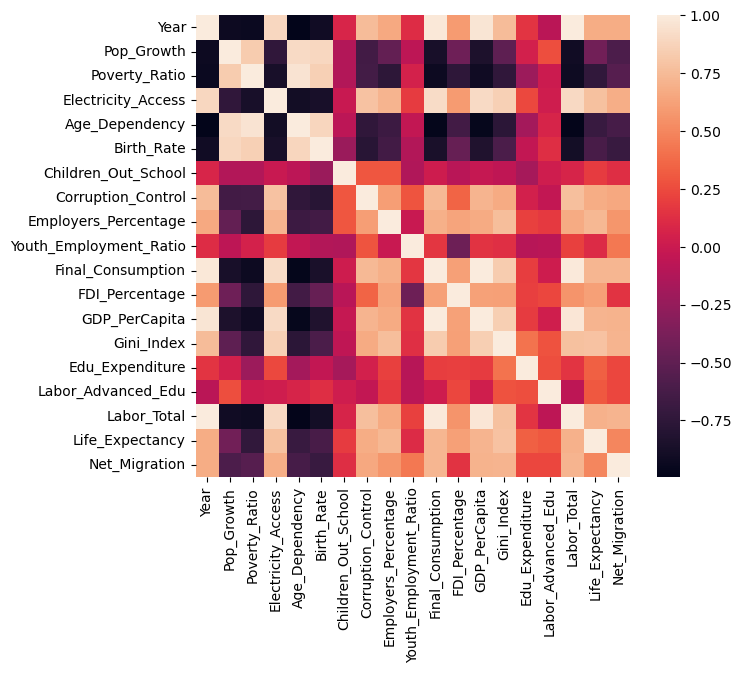

In [834]:
import seaborn as sns
corr_matrix = data.corr()
fig = plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix)

## Normalization

In [835]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a scaler object
scaler = StandardScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame, preserving the column names
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Check the result
data_scaled.head(5)

,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Birth_Rate,Children_Out_School,Corruption_Control,Employers_Percentage,Youth_Employment_Ratio,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,-1.661325,1.342646,2.541774,-1.615041,1.946865,1.417098,-2.813151e-16,-0.758704,-2.934654,1.927171,-1.555950,-3.022948,-1.534231,-1.358109,-1.327914e-15,1.305328,-1.465925,-1.669081,0.653038
1,-1.516862,1.179815,2.233235,-1.615041,1.681595,1.237922,-5.619955e-03,0.000000,-0.379891,1.323460,-1.556537,-2.359861,-1.558017,-1.057852,-1.735486e+00,-1.351092,-1.386615,-1.398971,-0.081938
2,-1.372399,1.018789,0.752248,-1.331484,1.448280,1.023142,1.446949e-01,-2.214519,-0.477925,0.117457,-1.412857,-0.940792,-1.446112,-1.391471,-1.180326e+00,0.882676,-1.375520,-1.086474,-0.754200
3,-1.227936,0.862624,0.690540,-1.266048,1.221162,0.850858,2.310488e-01,-1.464042,-0.984911,-0.327158,-1.275865,-1.182281,-1.324043,-1.691729,5.309934e-01,-1.670555,-1.268399,-0.854595,-1.222780
4,-1.083473,0.577294,0.813955,-1.026115,1.004148,0.751507,6.623436e-01,-1.203266,-0.084973,-0.467788,-1.217758,-0.452465,-1.261077,-1.324747,-8.729933e-01,-1.419296,-1.128841,-2.236727,-1.391016


## VIF

In [836]:
y = data_scaled['GDP_PerCapita']

x = data_scaled[["Pop_Growth",  
                 "Poverty_Ratio",
                "Electricity_Access",
                "Age_Dependency",
                "Birth_Rate",
                "Children_Out_School", 
                "Corruption_Control",
                "Employers_Percentage",
                "Youth_Employment_Ratio",
                "Final_Consumption",
                "FDI_Percentage",
                "Gini_Index",
                "Edu_Expenditure",
                "Labor_Advanced_Edu",
                "Labor_Total",
                'Life_Expectancy', 
                'Net_Migration']]


checking vif from all variable

In [837]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf

In [838]:
# Mengidentifikasi Multikolinieritas
# Menghitung VIF untuk setiapfitur
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


print("Variansi Inflasi Faktor (VIF):")
print(vif_data)

Variansi Inflasi Faktor (VIF):
                   feature          VIF
0               Pop_Growth   520.365354
1            Poverty_Ratio    63.151716
2       Electricity_Access    87.499328
3           Age_Dependency  1003.547266
4               Birth_Rate   115.683000
5      Children_Out_School     7.484599
6       Corruption_Control    11.582365
7     Employers_Percentage     9.968455
8   Youth_Employment_Ratio    44.800482
9        Final_Consumption   330.673822
10          FDI_Percentage    30.338545
11              Gini_Index    69.209176
12         Edu_Expenditure    10.293241
13      Labor_Advanced_Edu     3.258386
14             Labor_Total  1141.809651
15         Life_Expectancy    26.872696
16           Net_Migration    43.473649


predict with data before PCA

In [839]:
import statsmodels.api as sm
# Menambahkan intercept
X = sm.add_constant(x)

# 3. Membangun Model Regresi Linier Berganda
model = sm.OLS(y, X).fit()
model.summary()

#tidak perlu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          GDP_PerCapita   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     697.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.82e-08
Time:                        05:56:52   Log-Likelihood:                 57.019
No. Observations:                  24   AIC:                            -78.04
Df Residuals:                       6   BIC:                            -56.83
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.388e-17      0.009   1.51e-15      1.000      -0.022       0.022
Pop_Growth                -0.1101      0.209     -0.526      0.618      -0.623       0.402
Poverty_Ratio             -0.0295      0.073     -0.405      0.700      -0.208       0.149
Electricity_Access         0.1215      0.086      1.415      0.207      -0.089       0.332
Age_Dependency             0.7040      0.291      2.420      0.052      -0.008       1.416
Birth_Rate                 0.1490      0.099      1.509      0.182      -0.093       0.391
Children_Out_School       -0.0234      0.025     -0.932      0.387      -0.085       0.038
Corruption_Control         0.0374      0.031      1.197      0.276      -0.039       0.114
Employers_Percentage       0.0031      0.029      0.105      0.920      -0.068       0.074
Youth_Employment_Ratio    -0.1094      0.061     -1.780      0.125      -0.260       0.041
Final_Consumption          1.3162      0.167      7.883      0.000       0.908       1.725
FDI_Percentage            -0.0413      0.051     -0.817      0.445      -0.165       0.082
Gini_Index                 0.0224      0.076      0.293      0.779      -0.164       0.209
Edu_Expenditure           -0.0217      0.029     -0.737      0.489      -0.094       0.050
Labor_Advanced_Edu         0.0142      0.017      0.856      0.425      -0.026       0.055
Labor_Total                0.3243      0.310      1.045      0.336      -0.435       1.083
Life_Expectancy           -0.0038      0.048     -0.081      0.938      -0.120       0.113
Net_Migration             -0.0776      0.061     -1.282      0.247      -0.226       0.071
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.433
Skew:                           0.182   Prob(JB):                        0.805
Kurtosis:                       2.452   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [840]:
y_pred = model.predict(X)

error = y-y_pred
gab = pd.DataFrame({'Actual':y, 'Predicted': y_pred, 'Error':error})
gab

,Actual,Predicted,Error
0,-1.534231,-1.540158,0.005927
1,-1.558017,-1.563934,0.005917
2,-1.446112,-1.421794,-0.024317
3,-1.324043,-1.326867,0.002824
4,-1.261077,-1.267504,0.006427
5,-1.176985,-1.204132,0.027148
6,-0.935551,-0.918074,-0.017478
7,-0.735826,-0.706215,-0.029611
8,-0.508832,-0.488665,-0.020167
9,-0.438130,-0.478419,0.040289


In [841]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, y_pred)
meanSqErr = metrics.mean_squared_error(y, y_pred)
rootMeanSqError = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqError)

Mean Absolute Error:  0.0181428347835071
Mean Square Error:  0.0005057630469029712
Root Mean Square Error:  0.022489176216637444


## Principal Component Analysis

In [842]:
from sklearn.decomposition import PCA

model_pca = PCA()
x_pca = model_pca.fit_transform(x)

varians dari beberapa varibel

In [843]:
# Menampilkan komponen utama
explained_variance = model_pca.explained_variance_ratio_
print(f"Proporsi Variansi yang Dijelaskan : {explained_variance}")

Proporsi Variansi yang Dijelaskan : [5.77657964e-01 1.15049215e-01 9.31195463e-02 7.47661857e-02
 4.17474043e-02 3.34979132e-02 2.03625609e-02 1.63759686e-02
 1.01481780e-02 7.83977076e-03 4.26657170e-03 3.29891693e-03
 9.90113148e-04 6.03597885e-04 1.96855635e-04 4.40880422e-05
 3.51498703e-05]


hasil vif setelah di PCA

In [844]:
x_pca = pd.DataFrame(x_pca)
vif_data_pca = pd.DataFrame()
vif_data_pca['feature'] = x.columns
vif_data_pca['VIF'] = [variance_inflation_factor(x_pca.values, i) for i in range(x.shape[1])]


print("Variansi Inflasi Faktor (VIF):")
print(vif_data_pca)

Variansi Inflasi Faktor (VIF):
                   feature  VIF
0               Pop_Growth  1.0
1            Poverty_Ratio  1.0
2       Electricity_Access  1.0
3           Age_Dependency  1.0
4               Birth_Rate  1.0
5      Children_Out_School  1.0
6       Corruption_Control  1.0
7     Employers_Percentage  1.0
8   Youth_Employment_Ratio  1.0
9        Final_Consumption  1.0
10          FDI_Percentage  1.0
11              Gini_Index  1.0
12         Edu_Expenditure  1.0
13      Labor_Advanced_Edu  1.0
14             Labor_Total  1.0
15         Life_Expectancy  1.0
16           Net_Migration  1.0


## Modelling After Do PCA Method

#####  Modelling PCA1 dengan menambahin intercept

In [845]:
import statsmodels.api as sm
# Menambahkan intercept
X_pca = sm.add_constant(x_pca)

# 3. Membangun Model Regresi Linier Berganda
modelPCA = sm.OLS(y, X_pca).fit()
modelPCA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          GDP_PerCapita   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     697.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.82e-08
Time:                        05:56:52   Log-Likelihood:                 57.019
No. Observations:                  24   AIC:                            -78.04
Df Residuals:                       6   BIC:                            -56.83
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.009   1.51e-15      1.000      -0.022       0.022
0             -0.3059      0.003   -104.403      0.000      -0.313      -0.299
1              0.0251      0.007      3.817      0.009       0.009       0.041
2             -0.0022      0.007     -0.306      0.770      -0.020       0.016
3             -0.1537      0.008    -18.875      0.000      -0.174      -0.134
4             -0.0953      0.011     -8.744      0.000      -0.122      -0.069
5              0.0962      0.012      7.908      0.000       0.066       0.126
6             -0.0231      0.016     -1.478      0.190      -0.061       0.015
7              0.0854      0.017      4.906      0.003       0.043       0.128
8              0.3865      0.022     17.485      0.000       0.332       0.441
9             -0.1344      0.025     -5.344      0.002      -0.196      -0.073
10             0.0925      0.034      2.713      0.035       0.009       0.176
11             0.0113      0.039      0.292      0.780      -0.084       0.106
12            -0.0711      0.071     -1.005      0.354      -0.244       0.102
13             0.5757      0.091      6.352      0.001       0.354       0.797
14             0.8605      0.159      5.422      0.002       0.472       1.249
15            -0.9182      0.335     -2.738      0.034      -1.739      -0.098
16            -0.4070      0.376     -1.084      0.320      -1.326       0.512
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.433
Skew:                           0.182   Prob(JB):                        0.805
Kurtosis:                       2.452   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

uji heterokedastisitas pada model PCA1

In [846]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#breusch-pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

test_result = sms.het_breuschpagan(modelPCA.resid, modelPCA.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', 12.946645424330807),
 ('p-value', 0.7397504120149669),
 ('f-value', 0.41339524902866276),
 ('f p-value', 0.9290109957928954)]

uji autokoreladi pada model PCA1

In [847]:
#uji durbin watson
import statsmodels.api as sm

# Assuming your model (e.g., modelPCA) is already fitted
# Perform the Breusch-Godfrey test with 'nlags' specifying the number of lags to test for
bg_test = sm.stats.acorr_breusch_godfrey(modelPCA, nlags=1)

# bg_test returns: Lagrange multiplier statistic, p-value, f-statistic, f-test p-value
names = ['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f-test p-value']

# Display the results
for name, result in zip(names, bg_test):
    print(f'{name}: {result}')


Lagrange multiplier statistic: 3.2155704080703016
p-value: 0.07294076433464182
f-statistic: 0.773552719801096
f-test p-value: 0.4193763933261361


<Figure size 1200x600 with 0 Axes>

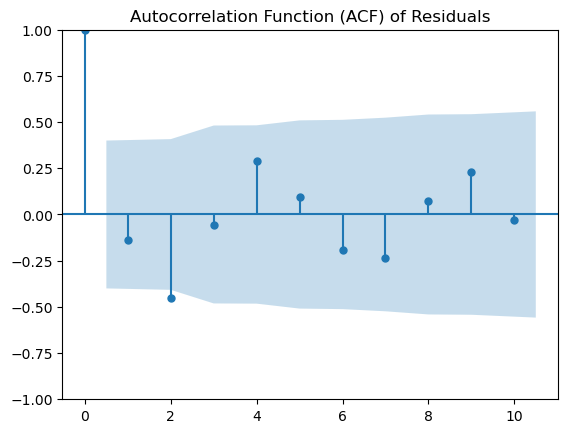

In [848]:
# 6. Uji Autokorelasi
# Plot ACF untuk melihat autokorelasi
plt.figure(figsize=(12, 6))
plot_acf(modelPCA.resid, lags=10)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


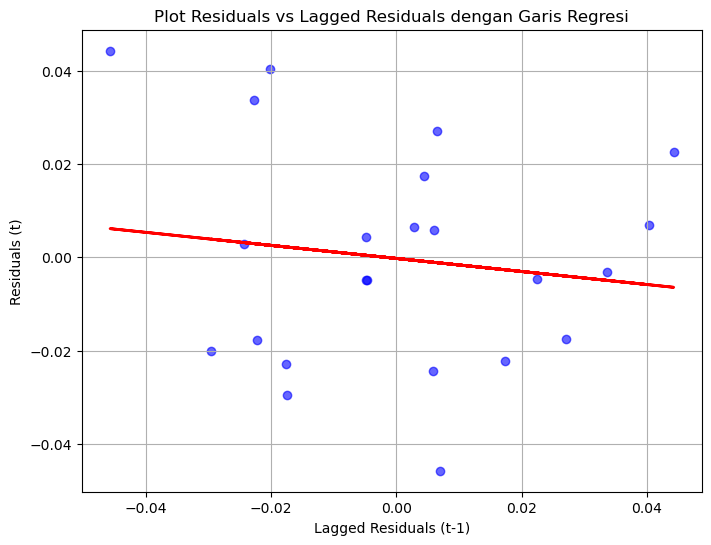

In [849]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Ambil residual dari model regresi
residuals1 = modelPCA.resid

# Membuat DataFrame untuk residual dan lagged residual (residual pada t-1)
df_residuals = pd.DataFrame({
    'Residuals': residuals1,
    'Lagged_Residuals': residuals1.shift(1)  # Menggeser residual untuk mendapatkan lagged residual
})

# Hapus baris pertama karena tidak memiliki nilai lag
df_residuals1 = df_residuals.dropna()

# Scatter plot Residuals vs Lagged Residuals
plt.figure(figsize=(8, 6))
plt.scatter(df_residuals1['Lagged_Residuals'], df_residuals1['Residuals'], color='blue', alpha=0.6)

# Membuat model regresi linier untuk lagged residuals
X_reg_pca1 = df_residuals1['Lagged_Residuals'].values.reshape(-1, 1)
y_reg_pca1 = df_residuals1['Residuals'].values

model_reg_pca1 = LinearRegression()
model_reg_pca1.fit(X_reg_pca1, y_reg_pca1)

# Prediksi untuk lagged residuals untuk menggambar garis regresi
y_pred_reg_pca1 = model_reg_pca1.predict(X_reg_pca1)

# Tambahkan garis regresi ke plot
plt.plot(df_residuals1['Lagged_Residuals'], y_pred_reg_pca1, color='red', linewidth=2)

# Plot label dan judul
plt.title('Plot Residuals vs Lagged Residuals dengan Garis Regresi')
plt.xlabel('Lagged Residuals (t-1)')
plt.ylabel('Residuals (t)')
plt.grid(True)
plt.show()

Uji normalitas pada model PCA 1

Shapiro-Wilk Statistic: 0.9727784395217896
P-value: 0.7355767488479614


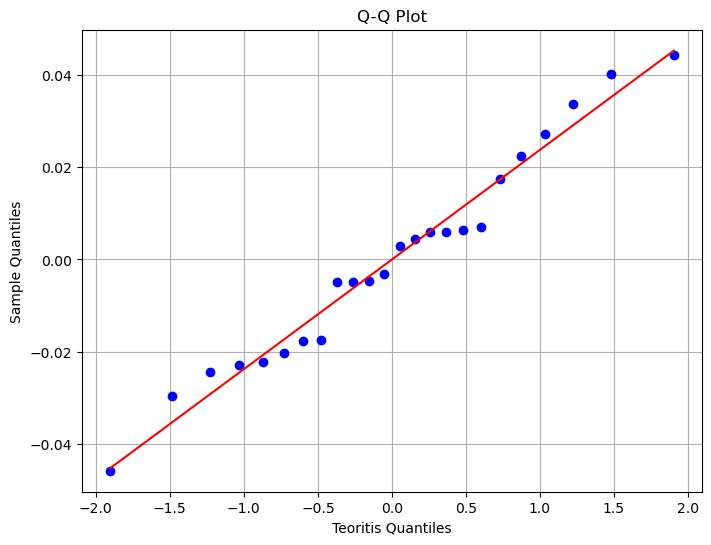

In [850]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ambil residual dari model
residual_PCA1 = modelPCA.resid

# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(residual_PCA1)

print(f'Shapiro-Wilk Statistic: {shapiro_stat}')
print(f'P-value: {shapiro_p_value}')

# Visualisasi Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residual_PCA1, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Teoritis Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()


In [851]:
# Uji Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residual_PCA1, 'norm', args=(np.mean(residuals), np.std(residuals)))

print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {ks_p_value}')


KS Statistic: 0.12892091398232042
P-value: 0.7733981635938886


predict data dari model PCA1

In [852]:
y_pred_pca1= modelPCA.predict(X_pca)

error = y-y_pred_pca1
gab = pd.DataFrame({'Actual':y, 'Predicted': y_pred_pca1, 'Error':error})
gab

,Actual,Predicted,Error
0,-1.534231,-1.540158,0.005927
1,-1.558017,-1.563934,0.005917
2,-1.446112,-1.421794,-0.024317
3,-1.324043,-1.326867,0.002824
4,-1.261077,-1.267504,0.006427
5,-1.176985,-1.204132,0.027148
6,-0.935551,-0.918074,-0.017478
7,-0.735826,-0.706215,-0.029611
8,-0.508832,-0.488665,-0.020167
9,-0.438130,-0.478419,0.040289


model evaluation PCA1

In [853]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, y_pred_pca1)
meanSqErr = metrics.mean_squared_error(y, y_pred_pca1)
rootMeanSqError = np.sqrt(metrics.mean_squared_error(y, y_pred_pca1))

print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqError)

Mean Absolute Error:  0.018142834783507106
Mean Square Error:  0.0005057630469029687
Root Mean Square Error:  0.022489176216637388


##### ModelPCA2 menghapus variabel yang ga significant dan juga intercept

x_pca2 = x_pca bukan X_pca karena saya tidak ingin menggunakan intercept karena nilai intercept tidak signifikan

In [854]:
x_pca2 = x_pca
x_pca2.pop(2)
x_pca2.pop(11)
x_pca2

,0,1,3,4,5,6,7,8,9,10,12,13,14,15,16
0,5.659222,1.354478,0.318809,0.072928,1.504627,-1.098897,-0.146142,0.159848,-0.031474,0.109034,0.092182,-0.026229,-0.002994,-0.016618,0.002197
1,4.610436,2.519082,0.702979,-0.349217,-0.852292,1.023652,-0.853652,0.206044,0.089682,-0.539819,0.014949,0.018104,0.022839,0.017805,-0.011756
2,4.287587,-0.141901,0.644351,-0.992841,0.699066,0.706832,1.057711,-0.395732,-0.378473,0.201111,-0.161567,-0.150591,-0.083816,0.017594,-0.005968
3,4.067809,0.622044,-0.283131,1.592451,-0.492321,0.201847,0.618606,-0.311694,-0.260265,-0.236858,-0.245048,0.069688,0.017627,-0.051292,0.008483
4,3.734046,1.060447,0.297493,0.366980,-0.171087,1.252716,-0.005179,-0.068584,0.380243,0.663633,0.204807,-0.011620,0.028863,0.015165,0.001000
5,3.217004,-2.079990,1.558114,-0.428048,1.219051,-0.433278,0.012545,-0.038097,0.479742,-0.514522,-0.023153,-0.043810,0.047441,-0.003676,-0.007553
6,2.879720,-1.332596,0.273517,0.010570,0.325940,-0.483811,-0.337901,-0.164645,-0.278238,0.034534,0.267930,0.211444,-0.061144,-0.003649,0.030448
7,2.080639,0.008542,-0.969953,0.118557,-1.375565,-0.601846,-0.500318,0.242382,0.369032,-0.134558,-0.118501,-0.098795,-0.026099,-0.002557,0.023052
8,1.684463,-0.285271,-0.526412,-0.888328,-1.010740,-1.017597,-0.091469,-0.072628,0.688885,0.466859,-0.061122,-0.005810,0.005385,-0.013237,-0.018977
9,1.683315,-0.443747,-1.824647,1.428836,-0.960427,-0.465953,0.268043,-0.073362,-0.450520,0.036724,0.103428,-0.040682,-0.031935,0.017824,-0.001645


modelPCA2 setelah dihapus 2 variabel yang sangat tidak signifikan

In [855]:
modelPCA2 = sm.OLS(y,x_pca2).fit()
modelPCA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          GDP_PerCapita   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1151.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):                    6.83e-13
Time:                        05:56:54   Log-Likelihood:                          56.666
No. Observations:                  24   AIC:                                     -83.33
Df Residuals:                       9   BIC:                                     -65.66
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.3059      0.002   -126.002      0.000      -0.311      -0.300
1              0.0251      0.005      4.606      0.001       0.013       0.037
3             -0.1537      0.007    -22.780      0.000      -0.169      -0.138
4             -0.0953      0.009    -10.553      0.000      -0.116      -0.075
5              0.0962      0.010      9.544      0.000       0.073       0.119
6             -0.0231      0.013     -1.783      0.108      -0.052       0.006
7              0.0854      0.014      5.920      0.000       0.053       0.118
8              0.3865      0.018     21.102      0.000       0.345       0.428
9             -0.1344      0.021     -6.450      0.000      -0.182      -0.087
10             0.0925      0.028      3.274      0.010       0.029       0.156
12            -0.0711      0.059     -1.213      0.256      -0.204       0.062
13             0.5757      0.075      7.666      0.000       0.406       0.746
14             0.8605      0.132      6.544      0.000       0.563       1.158
15            -0.9182      0.278     -3.304      0.009      -1.547      -0.290
16            -0.4070      0.311     -1.308      0.223      -1.111       0.297
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.313
Skew:                           0.190   Prob(JB):                        0.855
Kurtosis:                       2.589   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

uji heteroskedastisitas pada modelpca2

In [856]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#breusch-pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

test_result = sms.het_breuschpagan(modelPCA2.resid, modelPCA2.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', 7.981637378535118),
 ('p-value', 0.8902804765920593),
 ('f-value', 0.29896828660276126),
 ('f p-value', 0.9809815908217704)]

uji autokorelasi pada modelpca2

In [857]:
#uji durbin watson
import statsmodels.api as sm

# Assuming your model (e.g., modelPCA) is already fitted
# Perform the Breusch-Godfrey test with 'nlags' specifying the number of lags to test for
bg_test = sm.stats.acorr_breusch_godfrey(modelPCA2, nlags=1)

# bg_test returns: Lagrange multiplier statistic, p-value, f-statistic, f-test p-value
names = ['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f-test p-value']

# Display the results
for name, result in zip(names, bg_test):
    print(f'{name}: {result}')


Lagrange multiplier statistic: 3.6984771560837304
p-value: 0.05446215351341989
f-statistic: 1.2752412856725612
f-test p-value: 0.29599361572409943


<Figure size 1200x600 with 0 Axes>

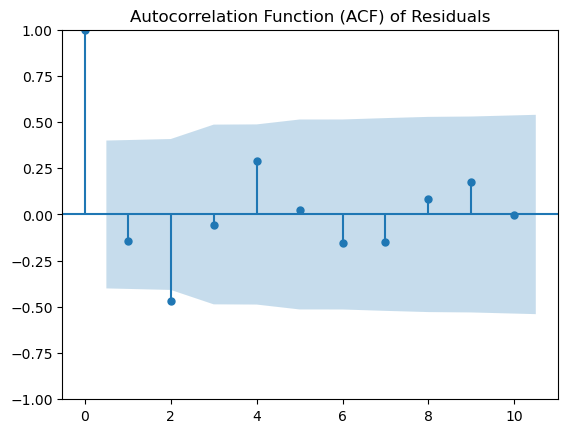

In [858]:
# 6. Uji Autokorelasi
# Plot ACF untuk melihat autokorelasi
plt.figure(figsize=(12, 6))
plot_acf(modelPCA2.resid, lags=10)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


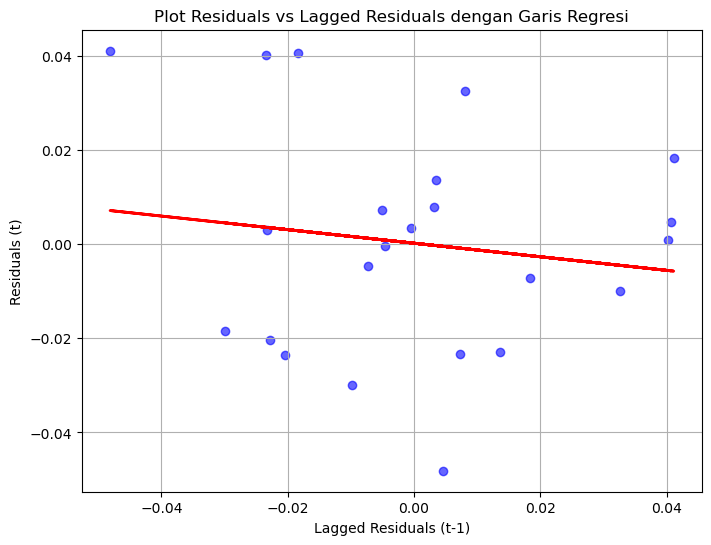

In [859]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Ambil residual dari model regresi
residuals2 = modelPCA2.resid

# Membuat DataFrame untuk residual dan lagged residual (residual pada t-1)
df_residuals = pd.DataFrame({
    'Residuals': residuals2,
    'Lagged_Residuals': residuals2.shift(1)  # Menggeser residual untuk mendapatkan lagged residual
})

# Hapus baris pertama karena tidak memiliki nilai lag
df_residuals2 = df_residuals.dropna()

# Scatter plot Residuals vs Lagged Residuals
plt.figure(figsize=(8, 6))
plt.scatter(df_residuals2['Lagged_Residuals'], df_residuals2['Residuals'], color='blue', alpha=0.6)

# Membuat model regresi linier untuk lagged residuals
X_reg_pca2 = df_residuals2['Lagged_Residuals'].values.reshape(-1, 1)
y_reg_pca2 = df_residuals2['Residuals'].values

model_reg_pca2 = LinearRegression()
model_reg_pca2.fit(X_reg_pca2, y_reg_pca2)

# Prediksi untuk lagged residuals untuk menggambar garis regresi
y_pred_reg_pca2 = model_reg_pca2.predict(X_reg_pca2)

# Tambahkan garis regresi ke plot
plt.plot(df_residuals2['Lagged_Residuals'], y_pred_reg_pca2, color='red', linewidth=2)

# Plot label dan judul
plt.title('Plot Residuals vs Lagged Residuals dengan Garis Regresi')
plt.xlabel('Lagged Residuals (t-1)')
plt.ylabel('Residuals (t)')
plt.grid(True)
plt.show()


uji normalitas (KS)

 Uji normalitas dilakukan untuk melihat apakah nilai residu berdistribusi normal atau tidak. Model regresi yang baik ialah model yang memiliki residu yang terdistribusi secara normal. Tes normalitas, tidak perlu dilakukan kepada setiap variabel yang ada, akan tetapi untuk nilai-nilai residual saja.

Shapiro-Wilk Statistic: 0.9595239162445068
P-value: 0.42893239855766296


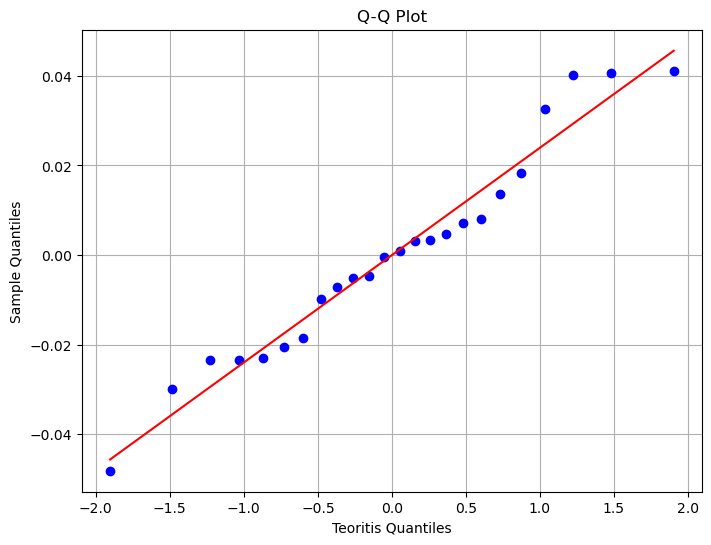

In [860]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ambil residual dari model
residual_PCA2 = modelPCA2.resid

# Uji Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(residual_PCA2)

print(f'Shapiro-Wilk Statistic: {shapiro_stat}')
print(f'P-value: {shapiro_p_value}')

# Visualisasi Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residual_PCA2, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Teoritis Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()


In [861]:
# Uji Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residual_PCA2, 'norm', args=(np.mean(residual_PCA2), np.std(residual_PCA2)))

print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {ks_p_value}')


KS Statistic: 0.11307411334623718
P-value: 0.8851881084261596


predict data dari model PCA2

In [862]:
y_pred_pca2= modelPCA2.predict(x_pca2)

error = y-y_pred_pca2
gab = pd.DataFrame({'Actual':y, 'Predicted': y_pred_pca2, 'Error':error})
gab

,Actual,Predicted,Error
0,-1.534231,-1.529200,-0.005031
1,-1.558017,-1.565270,0.007253
2,-1.446112,-1.422758,-0.023354
3,-1.324043,-1.327151,0.003108
4,-1.261077,-1.269071,0.007994
5,-1.176985,-1.209582,0.032597
6,-0.935551,-0.925652,-0.009900
7,-0.735826,-0.705897,-0.029929
8,-0.508832,-0.490380,-0.018452
9,-0.438130,-0.478844,0.040714


model evaluation PCA2

In [863]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, y_pred_pca2)
meanSqErr = metrics.mean_squared_error(y, y_pred_pca2)
rootMeanSqError = np.sqrt(metrics.mean_squared_error(y, y_pred_pca2))

print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqError)

Mean Absolute Error:  0.01782685899804547
Mean Square Error:  0.0005208476727159946
Root Mean Square Error:  0.02282208738735339


korelasi dari variabel GDP dengan masing masing variabel

In [864]:
# Melihat korelasi variabel 'GDP per capita (current US$)' terhadap semua variabel lain
correlation_with_gdp_per_capita = data_scaled.corr()['GDP_PerCapita']

# Menampilkan hasil
print(correlation_with_gdp_per_capita)


Year                      0.968058
Pop_Growth               -0.846636
Poverty_Ratio            -0.914483
Electricity_Access        0.913471
Age_Dependency           -0.966613
Birth_Rate               -0.825001
Children_Out_School      -0.028440
Corruption_Control        0.712252
Employers_Percentage      0.672168
Youth_Employment_Ratio    0.148579
Final_Consumption         0.995946
FDI_Percentage            0.623307
GDP_PerCapita             1.000000
Gini_Index                0.847890
Edu_Expenditure           0.184411
Labor_Advanced_Edu        0.032587
Labor_Total               0.973408
Life_Expectancy           0.713787
Net_Migration             0.707481
Name: GDP_PerCapita, dtype: float64


| Variable                | Correlation |
|-------------------------|-------------|
| Year                    | 0.968058    |
| Pop_Growth              | -0.846636   |
| Poverty_Ratio           | -0.914438   |
| Electricity_Access      | 0.913471    |
| Age_Dependency          | -0.966613   |
| Birth_Rate              | -0.825001   |
| Children_Out_School     | -0.028400   |
| Corruption_Control      | 0.172252    |
| Employers_Percentage    | 0.671268    |
| Youth_Employment_Ratio  | 0.148579    |
| Final_Consumption       | 0.995946    |
| FDI_Percentage          | 0.623367    |
| GDP_PerCapita           | 1.000000    |
| Gini_Index              | 0.847890    |
| Edu_Expenditure         | 0.184141    |
| Labor_Advanced_Edu      | 0.025287    |
| Labor_Total             | 0.973048    |
| Life_Expectancy         | 0.713787    |
| Net_Migration           | 0.704781    |


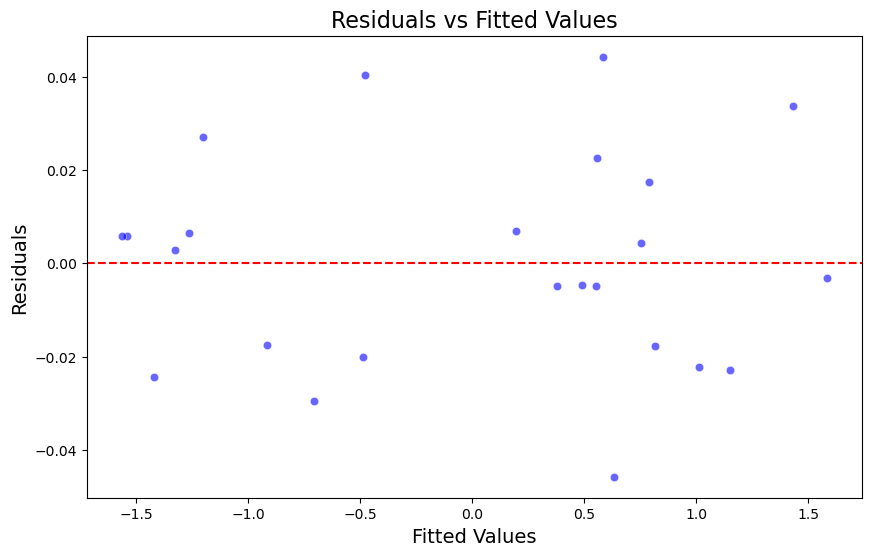

In [865]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming modelPCA is already fitted
# Get the residuals and fitted values
residuals = modelPCA.resid
fitted = modelPCA.fittedvalues

# Create a scatter plot of residuals vs fitted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted, y=residuals, color='blue', alpha=0.6)

# Add a horizontal line at 0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Set labels and title
plt.title('Residuals vs Fitted Values', fontsize=16)
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Show the plot
plt.show()
